In [1]:
import pandas as pd
import seaborn as sns
import os, sys

In [2]:

path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
sys.path.insert(0, path_parent+'/notebooks')

In [3]:
df = pd.read_csv('data/AdSmartABdata.csv')

In [4]:
# check if there is a null entry
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

#### The Histogram plot shows the distribution of hour and operating system also, the count of yes and no in the dataset


array([[<AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'platform_os'}>],
       [<AxesSubplot:title={'center':'yes'}>,
        <AxesSubplot:title={'center':'no'}>]], dtype=object)

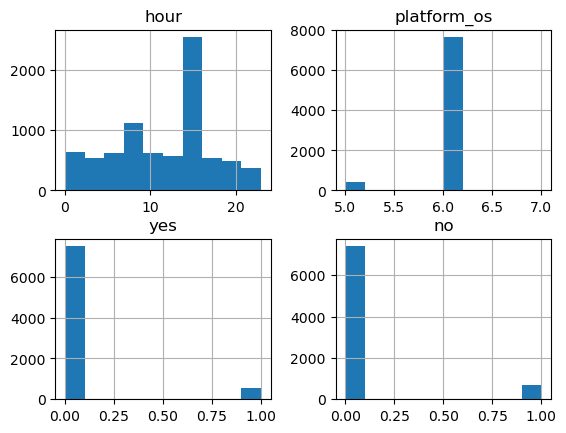

In [5]:
df.hist()

#### The correlation plot shows the features are uncorrelated

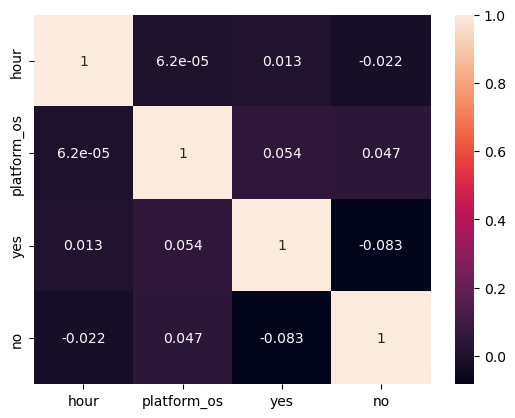

In [7]:
ax = sns.heatmap(df.corr(), annot=True)

In [7]:
# unique values in each features
df.nunique()

auction_id     8077
experiment        2
date              8
hour             24
device_make     270
platform_os       3
browser          15
yes               2
no                2
dtype: int64

In [9]:
# size of the dataset and also checks if there is a duplicated auction id
df.shape

(8077, 9)

In [10]:
df.dtypes

auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object

In [11]:
df.head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
9,004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342,control,2020-07-05,14,Generic Smartphone,6,Chrome Mobile,0,0


#### Most of the users use operating system with ID=6

/home/owon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='platform_os', ylabel='Density'>

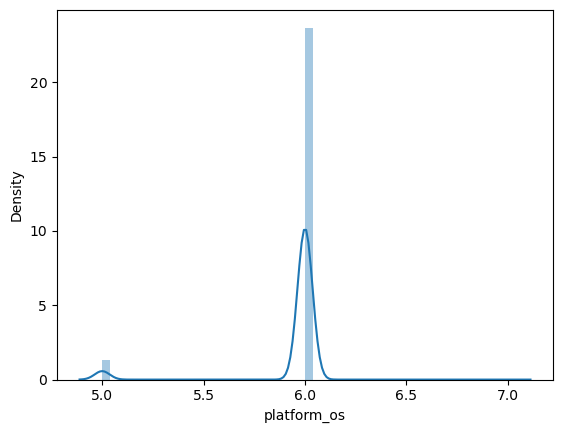

In [14]:
# distribution of platform os is on 5,6 and 7
sns.distplot(df['platform_os'])

In [15]:
df.experiment.value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [16]:
df.shape

(8077, 9)

#### Most of the exposed and control group are distributed to operating system platform id of 6
#### the exposed group has samples in platform id = 6

<AxesSubplot:xlabel='experiment', ylabel='platform_os'>

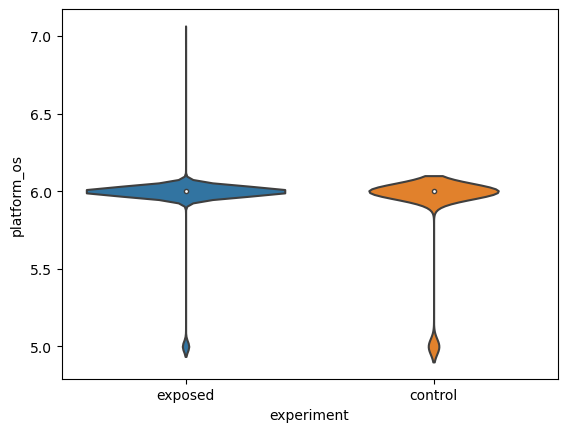

In [17]:
# there is no control entry for platform os of 7, this also requires randomization
sns.violinplot(x=df['experiment'],y=df['platform_os'])

In [18]:
device_make = df['device_make'].unique()

In [19]:
df['dev_make_mapped'] = df.device_make.astype("category").cat.codes
df['browser_mapped'] = df.browser.astype('category').cat.codes

In [20]:
df.device_make.nunique(),df.dev_make_mapped.nunique()

(270, 270)

#### The exposed and the control group have fairly the same distributions with device make

<AxesSubplot:xlabel='experiment', ylabel='dev_make_mapped'>

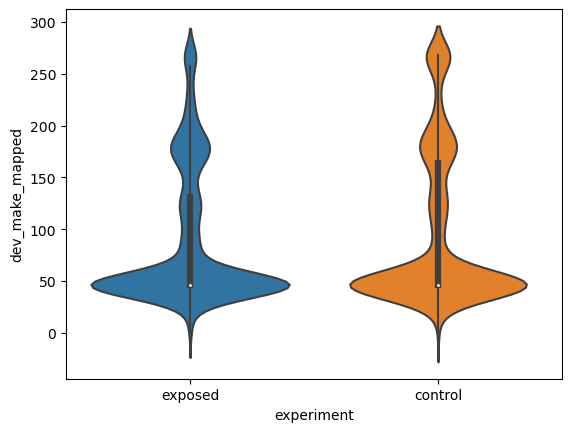

In [21]:
sns.violinplot(y=df['dev_make_mapped'],x=df['experiment'])

#### The control and exposed group have fairly equal distribution

<AxesSubplot:xlabel='experiment', ylabel='browser_mapped'>

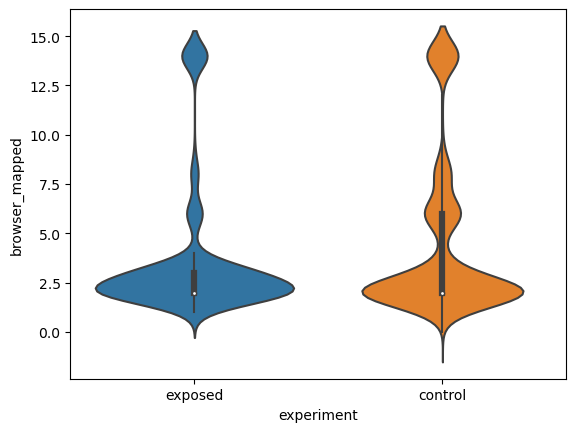

In [22]:
sns.violinplot(y=df['browser_mapped'],x=df['experiment'])

#### The plot shows most of the data is collected round 15:00 hours

/home/owon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hour', ylabel='Density'>

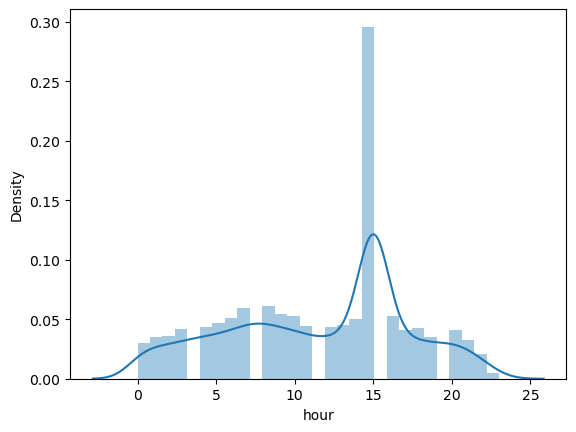

In [23]:
#distribution plot
sns.distplot(df['hour'])

In [24]:
df.auction_id.value_counts().nlargest(5)

0008ef63-77a7-448b-bd1e-075f42c55e39    1
aa14b324-5c46-4b3a-8e75-18d78968495b    1
aa84454c-a749-4c98-bf9f-1f99c04416af    1
aa6ecb40-6a48-4c06-a611-4c9aa9023ea8    1
aa6c6cda-e498-4e8f-b886-1d969bd376ea    1
Name: auction_id, dtype: int64

In [28]:
def explore_categoricals(df):
    for x in df.columns:
        print('*********************************************************')
        print("For Category: "+x+"\n")
        if df[x].dtype == 'object':
            print(df[x].value_counts().nlargest(5))
        print('\n\n')

In [29]:
explore_categoricals(df[['auction_id','experiment','date','device_make','platform_os','browser']])

*********************************************************
For Category: auction_id

0008ef63-77a7-448b-bd1e-075f42c55e39    1
aa14b324-5c46-4b3a-8e75-18d78968495b    1
aa84454c-a749-4c98-bf9f-1f99c04416af    1
aa6ecb40-6a48-4c06-a611-4c9aa9023ea8    1
aa6c6cda-e498-4e8f-b886-1d969bd376ea    1
Name: auction_id, dtype: int64



*********************************************************
For Category: experiment

control    4071
exposed    4006
Name: experiment, dtype: int64



*********************************************************
For Category: date

2020-07-03    2015
2020-07-09    1208
2020-07-08    1198
2020-07-04     903
2020-07-10     893
Name: date, dtype: int64



*********************************************************
For Category: device_make

Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
Name: device_make, dtype: int64



*********************************************************
For Cate

In [64]:
df.shape

(8077, 11)

In [65]:
df.yes.value_counts()

0    7505
1     572
Name: yes, dtype: int64

In [67]:
# we can conclude that the dataset is mostly yes==0 and no==0
df.no.value_counts()

0    7406
1     671
Name: no, dtype: int64